# 한국어 전처리 패키지


형태소와 문장 토크나이징 도구들인 Konlpy와 KSS(korean sentence splitter)와 유용하게 사용할 수 있는 패키지

## 1. PyKoSpacing

띄어 쓰기가 되어 있지 않은 문장을 띄어쓰기 한 문장으로 변환 시켜 줌\
PykoSpacing은 대용량 corpus를 학습하여 만들어진 띄어쓰기 딥 러닝 모델


pip install git+https://github.com/haven-jeon/PyKoSpacing.git 를 통해 설치가 가능하다


In [1]:
sent = '김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를\
        가리는 결전의 날을 앞두고 10년간 함게 훈련한 사형인 유연재(김광수 분)를 찾으러\
        속세로 내려온 인물이다.'

In [2]:
# 앞의 문장을 띄어쓱기가 없는 문장으로 만들어 보자

new_sent = sent.replace(" ", '')    # 띄어쓰기가 없는 문장으로 임의로 만들어 보자
print(new_sent)

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함게훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.


이를 PyKoSpacing의 입력으로 사용하여 원 문장과 비교

In [3]:
from pykospacing import Spacing

spacing = Spacing()
kospacing_sent = spacing(new_sent)

print(sent)
print(kospacing_sent)

김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를        가리는 결전의 날을 앞두고 10년간 함게 훈련한 사형인 유연재(김광수 분)를 찾으러        속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함게 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


정확히 결과가 일치하는 것을 확인할 수 있다.

## 2. Py-Hanspell

Py-Hanspell은 네이버 한글 맞춤법 검사기를 바탕으로 만들어진 패키지

pip install git+https://github.com/ssut/py-hanspell.git

In [ ]:
from hanspell import spell_checker

sent = "마춤뻡 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

## 3. SOYNLP를 이용한 단어 토큰화

soynlp는 품사 태깅, 단어 토큰화 등을 지원하는 단어 tokenizer.\
\
비지도 학습으로 단어 토큰화를 한다는 특징을 가지고 있으며, 데이터에 자주 등장하는 단어들을 단어로 분석\

soynlp 단어 tokenizer는 내부적으로 단어 점수표로 동작한다.

이 점수는 **응집 확률(cohesion probability)** 와 **브랜칭 엔트로피(branching entropy)**


pip install soynlp  를 통해 설치가 가능하다.

### 1. 신조어 문제

soynlp를 소개하기 전 기존의 형태소 분석기가 가진 문제는 무엇이였는지. SOYNLP가 어떤 점에서 유용한지 정리해보자\
기존의 형태소 분석기는 신조어나 형태소 분석기에 등록되지 않은 단어 같은 경우에는 제대로 구분하지 못하는 단점이 있다

In [14]:
from konlpy.tag import Okt
tokenizer = Okt()
print(tokenizer.morphs('아이브 장원영 1월 최애돌 기부 요정'))

['아이브', '장원영', '1월', '최애', '돌', '기부', '요정']


아이브:아이돌 이름\
장원영: 아이브 멤버\
최애돌: 최고로 애정하는 캐릭터\
위의 형태소 분석 결과에서는 전부 분리된 결과를 보여준다

text data에서 특정 문자 시퀀스가 함께 자주 등장하는 빈도가 높고, 앞 뒤로 조사 or 완전히 다른 단어가 등장하는 것을 고려하여\
해당 문자 시퀀스를 형태소라고 판단하는 단어 tokenizer라면??\
\
ex) 아이브라는 문자열이 자주 연결되어 등장한다면 -> 한 단어라고 판단\
아이브라는 단어 앞, 뒤에 '최고', '가수', '실력'과 같은 독립된 단어들이 계속하여 등장하면 아이브를 한 단어로 파악하는 식\
이런 idea를 가진 단어 tokenizer가 soynlp

### 2. 학습하기

soynlp는 기본적으로 학습에 기반한 tokenizer이므로 학습에 필요한 한국어 문서를 다운로드함

In [3]:
import urllib.request
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [4]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt", filename="2016-10-20.txt")

('2016-10-20.txt', <http.client.HTTPMessage at 0x20c68aa07f0>)

훈련 데이터를 다수의 문서로 분리

In [5]:
# train data를 다수의 문서로 분리

corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)

30091

총 3만 91개의 문서가 존재한다\
상위 3개의 문서를 출력.

In [7]:
i = 0
for document in corpus:
    if len(document) > 0:
        print(document)
        i = i+1
    if i ==3:
        break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

정상 출력되는 것을 확인하였다.\
soynlp는 학습 기반의 단어 tokenizer -> 기존의 KoNLPy에서 제공하는 형태소 분석기들과는 달리 학습과정이 필요\
\
이는 전체 corpus로부터 응집 확률과 브랜칭 엔트로피 단어 점수표를 만드는 과정.WordExtractor.extract()를 통해서 전체 corpus에 대해 단어 점수표를 계산

In [8]:
word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 0.771 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


학습이 완료되었다

### 3. SOYNLP의 응집 확률(cohesion probability)

응집 확률은 내부 문자열(substring)이 얼마나 응집하여 자주 등장하는지 판단하는 척도\
응집 확률은 문자열은 문자 단위로 분리하여 내부 문자열을 만드는 과정에서 왼쪽부터 순서대로 문자를 추가하며 각 문자열이 주어졌을 때, 그 다음 문자가\
나올 확률을 계산하여 누적곱을 한 값.이 값이 높을수록 전체 corpus에서 이 문자열 시퀀스는 하나의 단어로 등장할 가능성이 높다.\
수식이 아래와 같다


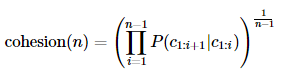

'반포한강공원에' 라는 7의 길이를 가진 문자 스퀀스에 대해서 각 내부 문자열의 스코어를 구하는 과정은 다음과 같다\
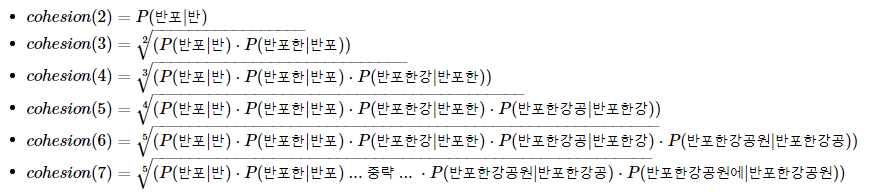


직접 응집 확률(cohesion probability)을 계산해보자

In [9]:
word_score_table["반포한"].cohesion_forward

0.08838002913645132

'반포한강'의 응집 확률은 '반포한'보다 높을지 확인

In [10]:
word_score_table["반포한강"].cohesion_forward

0.19841268168224552

'반포한강'은 '반포한'보다 응집 확률이 높다. '반포한강공'도 확인

In [11]:
word_score_table["반포한강공"].cohesion_forward

0.2972877884078849

'반포한강' 보다 응집 확률이 높다.\
'반포한강공원'은 어떨까?

In [12]:
word_score_table["반포한강공원"].cohesion_forward

0.37891487632839754

'반포한강공'보다 응집 확률이 높다.여기다가 조사 '에' 를 붙인 '반포한강공원에'는 어떨까 확인

In [13]:
word_score_table["반포한강공원에"].cohesion_forward

0.33492963377557666

'반포한강공원'보다 응집도가 낮아진다.

결합도는 '반포한강공원'일 때가 가장 높았다.\
\
응집도를 통해 판단하기에 하나의 단어로 판단하기에 가장 적합한 문자열은 '반포한강공원'임을 확인 할 수 있다

### 4. SOYNLP의 브랜칭 엔트로피 (branching entropy)

Branching Entropy는 확률 분포의 엔트로피 값을 사용\
**주어진 문자열에서 얼마나 다음 문자가 등장할 수 있는지를 판단하는 척도** \ 

ex) 단어를 한 문자씩 말하고 다음 문자를 맞추는 게임\
1st: 디 -> 등장할 문자가 매우 많음. 맞추기 힘듬\
2nd: 디스 : 디스코드 or 디스코? -> no. 답은 '플' \
3rd:디스플 : 이제 명확해진다. 그 다음 뒤에 올 단어는 '레' 

브랜칭 엔트로피를 주어진 문자 sequence에서 다음 문자 예측을 위해 헷갈리는 정도로 비유해보면, \
브랜칭 엔트포리의 값은 하나의 완성된 단어에 가까워질수록 **문맥** 으로 인해 점저 예측할 수 있게 되며 줄어드는 양상을 보임

In [14]:
word_score_table["디스"].right_branching_entropy

1.6371694761537934

In [15]:
word_score_table["디스플"].right_branching_entropy

-0.0

'디스' 다음에는 다양한 문자가 올 수 있어서 1.63이라는 값을 가지지만 '디스플'이라는 문자열 뒤에는 다음 문자로 '레'가 오는 것이 명확하여 0의 값을 가짐

In [16]:
word_score_table["디스플레"].right_branching_entropy

-0.0

In [17]:
word_score_table["디스플레이"].right_branching_entropy

3.1400392861792916

값이 갑자기 증가하는 이유는 문자 sequence '디스플레이'라는 문자 sequence 다음에는 조사나 다른 단어와 같은 다양한 경우가 있을 수 있기 때문\
\
이는 하나의 단어가 끝나면 그 경계 부분부터 다시 브렌칭 엔트포리의 값이 증가하게 됨을 의미\
\
이 값으로 단어를 판단하는 것이 가능할 것!

### 5. SOYNLP의 L tokenizer

한국어는 띄어쓰기 단어로 나눈 어절 token은 주로 L 토큰 + R 토큰의 형식을 가질 때가 많다\
ex) '공원에' 는 '공원+ 에'로 나눌 수 있다. or '공부하는'은 '공부 + 하는' 으로 나눌 수도 있을 것\
L tokenizer는 L 토큰 + R 토큰으로 나누되, 분리 기준을 점수가 가장 높은 L 토큰을 찾아내는 원리를 가지고 있다

In [18]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores = scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척결하자", flatten=False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

### 6. 최대 점수 tokenizer

최대 점수 tokenizer는 띄어쓰기가 되지 않는 문장에서 점수가 높은 글자 sequence를 순차적으로 찾아내는 tokenizer.\
띄어쓰기가 되어 있지 않은 문장을 넣어서 점수를 통해 token화된 결과를 확인해보자

In [19]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores = scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']

## 4. SOYNLP 를 이용한 반복되는 문자 정제

SNS나 채팅 데이터와 같은 한국어 데이터의 경우에는 ㅋㅋ,ㅎㅎ 등의 이모티콘의 경우\
불필요하게 연속되는 경우가 많은데 ㅋㅋ, ㅋㅋㅋ, ㅋㅋㅋㅋ와 같은 경우를 모두 서로 다른 단어로 처리하는 것은 불필요한다\
이에 반복되는 것은 하나로 정규화시켜준다

In [20]:
from soynlp.normalizer import *

In [22]:
print(emoticon_normalize('악 ㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('악 ㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('악 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('악 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ', num_repeats=2))

악 ㅋㅋ영화존잼쓰ㅠㅠ
악 ㅋㅋ영화존잼쓰ㅠㅠ
악 ㅋㅋ영화존잼쓰ㅠㅠ
악 ㅋㅋ영화존잼쓰ㅠㅠ


의미없게 반복되는 것은 비단 이모티콘에 한정되는 것은 아니다

In [24]:
print(repeat_normalize('와하하하하하하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하핫', num_repeats=2))

와하하핫
와하하핫
와하하핫


## 5. Customized KoNLPy

영어권 언어는 띄어쓰기만해도 단어들이 잘 분리되나, 한국어는 그렇지 않다\
한국어 데이터를 사용하여 모델을 구현하는 것만큼 형태소 분석기를 사용하여 단어 token화를 해볼 것. \

다음 상황에서 형태소 분석을 하면 어떻게 될까

형태소 분석 입력: '은경이는 사무실로 갔습니다.'  \
형태소 분석 결과: ['은', '경이', '는', '사무실', '로', '갔습니다', '.']

위 문장에서 '은경이'는 사람 이름이므로 제대로 된 결과ㅏ를 얻기 위해서는 '은','경이'와 같은 글자가 분리되는 것이 아니라 '은경이'또는 최소한 '은경'이라는 단어 token을 얻어야한다.\
이런 경우에서는 형태소 분석기에 사용자 사전을 추가해줄 수 있다.\
'은경이'는 하나의 단어이기 때문에 분리하지 말라고 형태소 분석기에 알려주는 것.\
\
사용자 사전을 추가하는 방법은 형태소 분석기마다 다른데, 생각보다 복잡한 경우들이 많다.\
이번에는 Customized Konlpy라는 사용자 사전 추가가 매우 쉬운 패키지를 사용한다.

In [25]:
pip install customized_konlpy

     ---------------------------------------- 0.0/881.5 kB ? eta -:--:--
     ------------------------------- ----- 757.8/881.5 kB 15.9 MB/s eta 0:00:01
     ------------------------------------- 881.5/881.5 kB 14.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


customized_konlpy에서 제공하는 형태소 분석기 Twitter를 사용하여 앞서 소개했던 예문을 단어 token화 해보자

In [26]:
from ckonlpy.tag import Twitter

twitter = Twitter()
twitter.morphs('은경이는 사무실로 갔습니다')

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['은', '경이', '는', '사무실', '로', '갔습니다']

앞서 소개한 예시와 마찬가지로 '은경이'라는 단어가 '은', '경이'와 같이 분리된다.\
이때 형태소 분석기 Twitter에 add_dictionary('단어','품사')와 같은 형식으로 사전 추가를 해줄 수 있다

In [27]:
twitter.add_dictionary('은경이', 'Noun')

제대로 반영되었는지 동일한 예문을 다시 형태소 분석해본다

In [28]:
twitter.morphs('은경이는 사무실로 갔습니다')

['은경이', '는', '사무실', '로', '갔습니다']

'은경이'라는 단어가 제대로 하나의 token으로 인식 되는 것을 확인 할 수 있다